# Data Analysis for the month of July 

In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('Desktop/uber-raw-data-jul14.csv')

In [3]:
data.tail()

,Date/Time,Lat,Lon,Base
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764
796120,7/31/2014 23:58:00,40.7199,-73.9884,B02764


In [4]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512


In [6]:
dt = '2014-07-01 00:03:00'

In [7]:
dt.split(' ')

['2014-07-01', '00:03:00']

In [8]:
y, m, d = dt.split('-')
y

'2014'

In [9]:
def get_date(dt):
    return dt.day
data['date'] = data['Date/Time'].map(get_date)

In [10]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [11]:
def get_hour(dt):
    return dt.hour
data['hours'] = data['Date/Time'].map(get_hour)

In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,date,weekday,hours
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764,31,3,23
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764,31,3,23
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764,31,3,23
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764,31,3,23
796120,2014-07-31 23:58:00,40.7199,-73.9884,B02764,31,3,23


Text(0.5, 1.0, 'Frequency by Date - uber - Jul 2014')

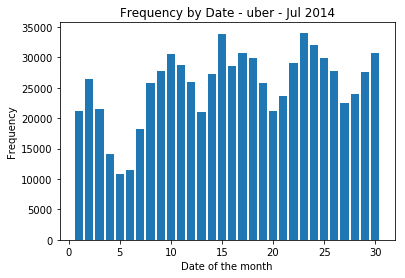

In [13]:
hist(data.date, bins=30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Date - uber - Jul 2014')

In [14]:
def count_rows(rows):
    return len(rows)
num = data.groupby('date').apply(count_rows)
num

date
1     21228
2     26480
3     21597
4     14148
5     10890
6     11443
7     18280
8     25763
9     27817
10    30541
11    28752
12    25936
13    21082
14    27350
15    33845
16    28607
17    30710
18    29860
19    25726
20    21212
21    23578
22    29029
23    34073
24    32050
25    29975
26    27708
27    22590
28    23981
29    27589
30    30740
31    33541
dtype: int64

In [15]:
s = num.sort_values()
s

date
5     10890
6     11443
4     14148
7     18280
13    21082
20    21212
1     21228
3     21597
27    22590
21    23578
28    23981
19    25726
8     25763
12    25936
2     26480
14    27350
29    27589
26    27708
9     27817
16    28607
11    28752
22    29029
18    29860
25    29975
10    30541
17    30710
30    30740
24    32050
31    33541
15    33845
23    34073
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - uber - Jul 2014')

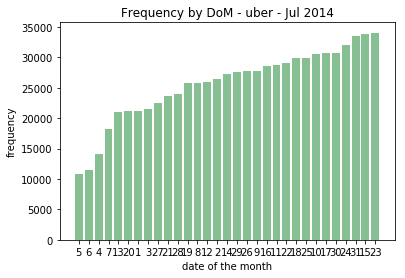

In [16]:
bar(range(0,31), s,color='#86bf91')
xticks(range(0,31), s.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Jul 2014')

(array([17953., 11527.,  8562.,  9199., 10040., 14932., 23456., 32545.,
        33387., 28486., 28558., 30120., 30900., 35832., 41357., 46053.,
        52403., 58260., 57268., 52332., 51859., 49528., 42218., 29346.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

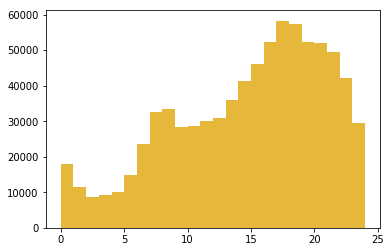

In [17]:
hist(data.hours, bins=24, range=(0, 24),color='#e5b73b')

([<matplotlib.axis.XTick at 0x2bb221af5f8>,
 <a list of 7 Text xticklabel objects>)

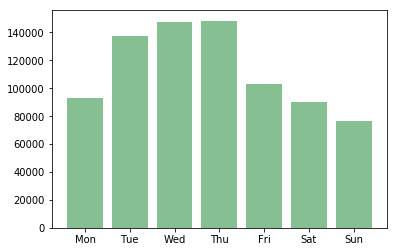

In [18]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#86bf91')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

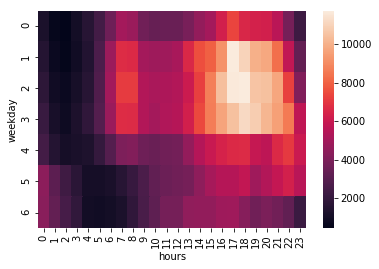

In [19]:
cross = data.groupby('weekday hours'.split()).apply(count_rows).unstack()
seaborn.heatmap(cross)